In [5]:
sample_space = {'Heads', 'Tails'}

probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')


Probability of choosing heads is 0.5


an event condition is a simple boolean function whose input is a single sample_space element.

In [6]:
def is_heads_or_tails(outcome):
    '''
    coin lands either heads or tails
    '''
    return outcome in {'Heads', 'Tails'}
def is_neither(outcome):
    '''
    coins lands on neither heads nor tails 
    '''
    return not is_heads_or_tails(outcome)

def is_heads(outcome):
    '''
    is the outcome heads?
    '''
    return outcome == 'Heads'

def is_tails(outcome):
    '''
    is the outcome tails?
    '''
    return outcome == 'Tails'

def get_matching_event(event_condition, sample_space):
    '''
    iterates through generic sample space and returns the set of outcome 
    where event_condition is True 
    '''
    return set([outcome for outcome in sample_space 
                if event_condition(outcome)])



In [7]:
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
    print(f'Event Condition: {event_condition.__name__}')
    event = get_matching_event(event_condition, sample_space)
    print(f'Event: {event}\n')
    

Event Condition: is_heads_or_tails
Event: {'Heads', 'Tails'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



In [8]:
def compute_probability(event_condition, generic_sample_space):
    '''
    extracts the event associated with an inputted event condition to compute 
    its probability 
    '''
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event)/len(generic_sample_space)

for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising form '{name}' is {prob}")
    

Probability of event arising form 'is_heads_or_tails' is 1.0
Probability of event arising form 'is_heads' is 0.5
Probability of event arising form 'is_tails' is 0.5
Probability of event arising form 'is_neither' is 0.0


now lets consider a biased coin (heads:tails = 4:1)

In [9]:
weighted_sample_space = {'Heads':4, 'Tails':1}

sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5 

event = get_matching_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

In [10]:
def compute_event_probability(event_condition, generic_sample_space):
    '''
    checks whether is the sample space is weighted/unweighted
    '''
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    
    event_size = sum(generic_sample_space[outcome] for outcome in event)

    return event_size/sum(generic_sample_space.values())


for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising form '{name}' is {prob}")

Probability of event arising form 'is_heads_or_tails' is 1.0
Probability of event arising form 'is_heads' is 0.8
Probability of event arising form 'is_tails' is 0.2
Probability of event arising form 'is_neither' is 0.0


computing nontrivial probabilities

problem 1: analyzing a fmaily with four children

In [11]:
possible_children = ['Boy', 'Girl']
sample_space = set()
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome)
'''inefficient way to do this'''

from itertools import product
all_combinations = product(*(4 * [possible_children]))
assert set(all_combinations) == sample_space
''' better way'''

sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space == sample_space_efficient
''' best 

In general, running product(possible_children, repeat=n)
returns an iterable over all possible combinations of n children.

'''


' best \n\nIn general, running product(possible_children, repeat=n)\nreturns an iterable over all possible combinations of n children.\n\n'

In [12]:
def has_two_boys(outcome):
    ''' does the family have two boys '''
    return len([child for child in outcome
                if child == 'Boy']) == 2

prob = compute_event_probability(has_two_boys, sample_space)
print(f'Probability of 2 boys is {prob}')



Probability of 2 boys is 0.375


Problem 2: Analyzing multiple die rolls (#rolls = 6, sum to 21)

In [13]:
possible_rolls = list(range(1,7))

sample_space = set(product(possible_rolls, repeat=6))

def has_sum_of_21(outcome):
    return sum(outcome) == 21

prob = compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sums to 21 with a probability of {prob}")

''' you can also use lambda expressions to simplify this process'''

prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)



6 rolls sums to 21 with a probability of 0.09284979423868313


Problem 3: Computing die-roll probabilities using weighted sample spaces
1. first compute the occurances of the sums

In [14]:
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] +=1
print(weighted_sample_space)    
print(sum(weighted_sample_space.values()))

assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1

n21_combo = weighted_sample_space[21]
print(f'There are {n21_combo} ways for 6 die rolls to sum to 21')



defaultdict(<class 'int'>, {21: 4332, 22: 4221, 27: 1666, 12: 456, 24: 3431, 19: 3906, 18: 3431, 20: 4221, 23: 3906, 26: 2247, 28: 1161, 15: 1666, 17: 2856, 13: 756, 14: 1161, 30: 456, 16: 2247, 25: 2856, 9: 56, 32: 126, 31: 252, 29: 756, 11: 252, 33: 56, 10: 126, 7: 6, 35: 6, 8: 21, 34: 21, 6: 1, 36: 1})
46656
There are 4332 ways for 6 die rolls to sum to 21


In [15]:
event = get_matching_event(lambda x: sum(x) == 21,sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space)

In [16]:
prob = compute_event_probability(lambda x: x == 21, weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f'6 rolls sum to 21 with a probability of {prob}')


6 rolls sum to 21 with a probability of 0.09284979423868313


In [17]:
print('Number of Elements in Unweighted Sample Space:')
print(len(sample_space))
print('Number of Elements in Weighted Sample Space:')
print(len(weighted_sample_space))


Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31


In [18]:
def is_in_interval(number, minimum, maximum):
    '''
    inclusive intervals 
    '''
    return minimum <= number <= maximum

prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), 
                                 weighted_sample_space)

print(f"Probability of interval is {prob}")



Probability of interval is 0.5446244855967078


In [19]:
def generate_coin_sample_space(numflips = 10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'],repeat=numflips):
        heads_counts = len([outcome for outcome in coin_flips
                           if outcome == 'Heads'])
        weighted_sample_space[heads_counts] +=1
    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10


## 7+ heads 
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10), 
                                 weighted_sample_space)
print(f'Probability of observing more than 7 heads is {prob}')


# 0-2 or 8-10 heads?
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7),
                                 weighted_sample_space)
print(f"Probability of observing more than 7 heads or 7 tails is {prob}")


Probability of observing more than 7 heads is 0.0546875
Probability of observing more than 7 heads or 7 tails is 0.109375


In [20]:
# 16/20 heads or 4/20 heads
weighted_sample_space_20_flips = generate_coin_sample_space(numflips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
                                  weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}")


Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


CHAPTER 2

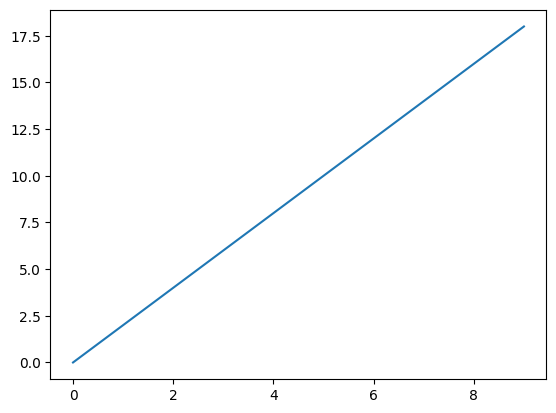

In [21]:
import matplotlib.pyplot as plt 
x = range(0,10)
y = [2 * value for value in x]
plt.plot(x,y)
#plt.axis('equal')
#plt.scatter(x,y)
plt.show()


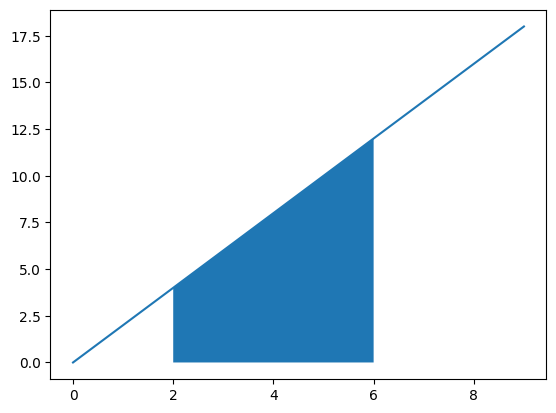

In [22]:
plt.plot(x,y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x,y,where=where)
plt.show()

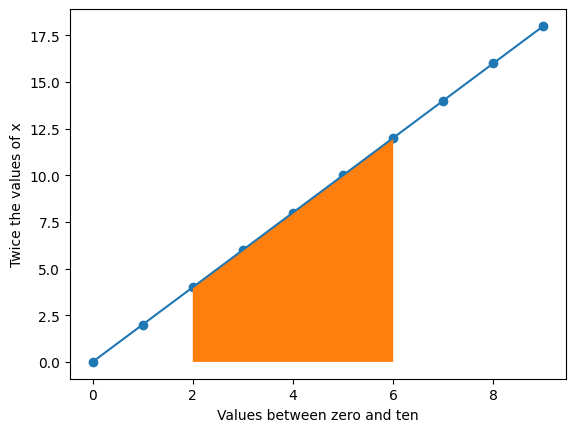

In [23]:
plt.plot(x,y)
plt.scatter(x,y)
plt.fill_between(x,y,where=where)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

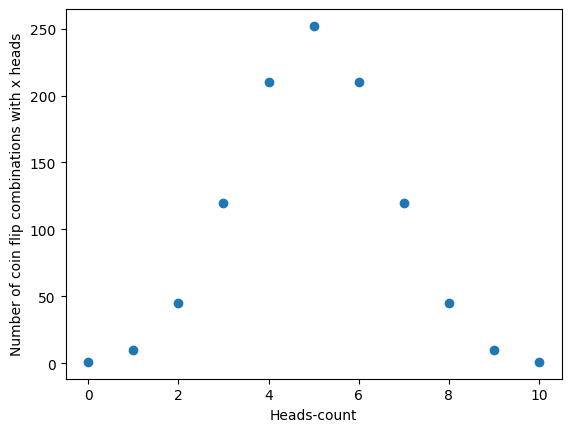

In [24]:
x10flips = list(weighted_sample_space.keys())
y10flips = [weighted_sample_space[key] for key in x10flips]
plt.scatter(x10flips, y10flips)
plt.xlabel('Heads-count')
plt.ylabel('Number of coin flip combinations with x heads')
plt.show()

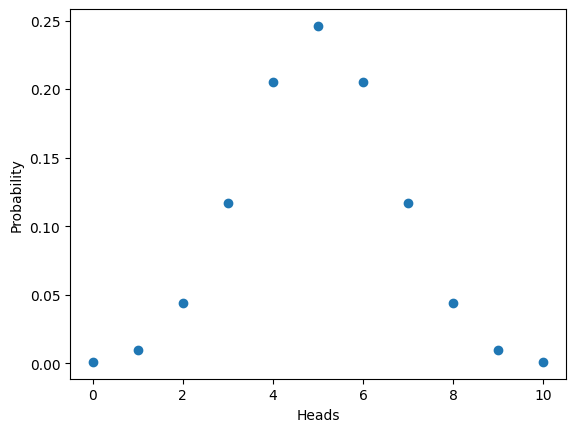

In [25]:
sample_space_size = sum(weighted_sample_space.values())
prob_x10flips = [value / sample_space_size for value in y10flips]
plt.scatter(x10flips, prob_x10flips)
plt.xlabel('Heads')
plt.ylabel('Probability')
plt.show()

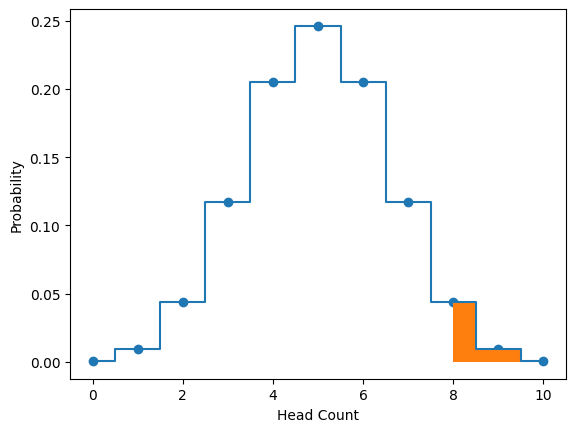

In [26]:
plt.plot(x10flips, prob_x10flips, ds='steps-mid')
plt.scatter(x10flips, prob_x10flips)
where = [is_in_interval(value, 8, 10) for value in x10flips]
plt.fill_between(x10flips, prob_x10flips, where=where ,step='mid')
plt.xlabel('Head Count')
plt.ylabel('Probability')
plt.show()

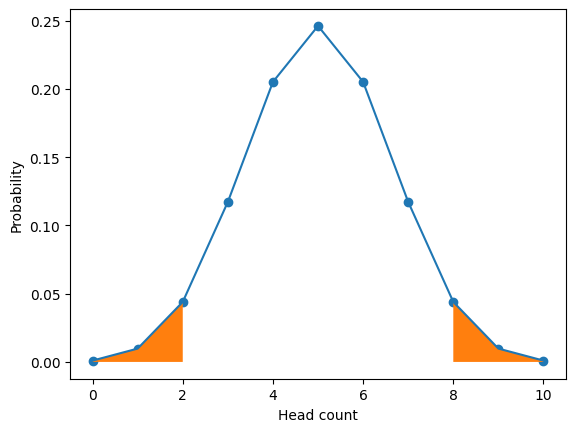

In [27]:
plt.plot(x10flips, prob_x10flips)
plt.scatter(x10flips, prob_x10flips)
where = [not is_in_interval(value, 3, 7) for value in x10flips]
plt.fill_between(x10flips, prob_x10flips, where=where)
plt.xlabel('Head count')
plt.ylabel('Probability')
plt.show()

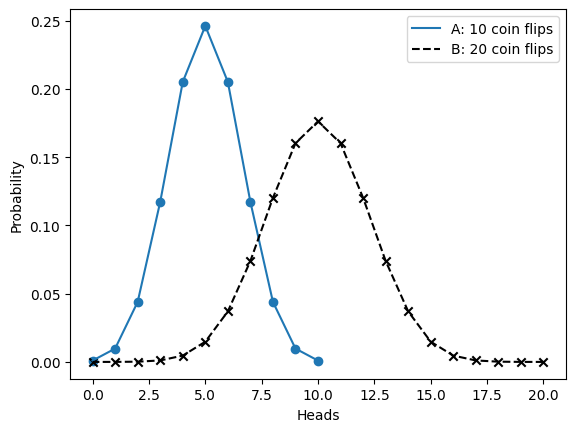

In [28]:
x20flips = weighted_sample_space_20_flips.keys()
y20flips = [value for value in weighted_sample_space_20_flips.values()]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x20flips = [value / sample_space_size for value in y20flips]

plt.plot(x10flips, prob_x10flips, label = 'A: 10 coin flips')
plt.scatter(x10flips, prob_x10flips)
plt.plot(x20flips, prob_x20flips, color = 'black', linestyle = '--', label = 'B: 20 coin flips')
plt.scatter(x20flips, prob_x20flips, color = 'k', marker='x')
plt.xlabel('Heads')
plt.ylabel('Probability')
plt.legend()
plt.show()

# black = k; red = r 

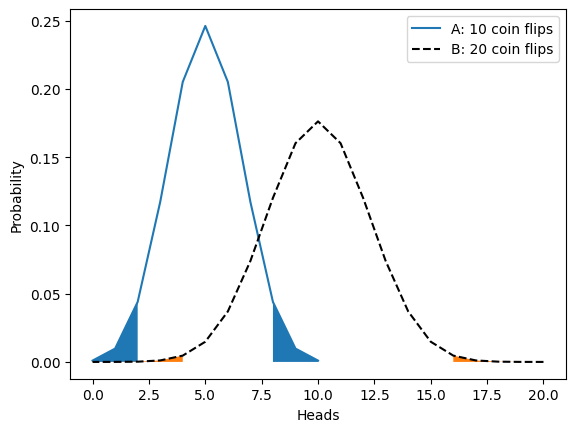

In [29]:
plt.plot(x10flips, prob_x10flips, label = 'A: 10 coin flips')
plt.plot(x20flips, prob_x20flips, color = 'black', linestyle = '--', label = 'B: 20 coin flips')
where = [not is_in_interval(value, 3, 7) for value in x10flips]
plt.fill_between(x10flips, prob_x10flips, where=where)
where2 = [not is_in_interval(value, 5, 15) for value in x20flips]
plt.fill_between(x20flips, prob_x20flips, where=where2)


plt.xlabel('Heads')
plt.ylabel('Probability')
plt.legend()
plt.show()

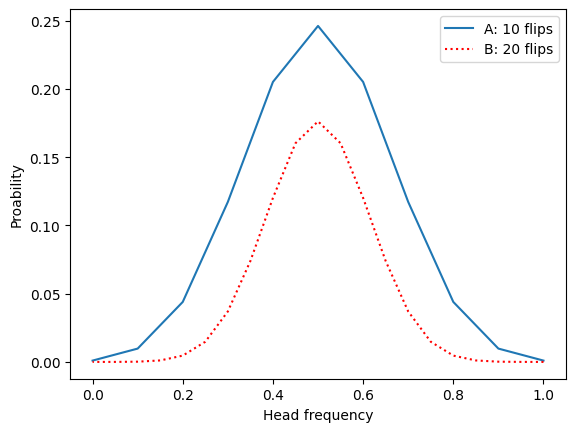

In [30]:
x10_freq = [head/10 for head in x10flips]
x20_freq = [head/20 for head in x20flips]
plt.plot(x10_freq, prob_x10flips, label = "A: 10 flips")
plt.plot(x20_freq, prob_x20flips, label = "B: 20 flips", color = 'r', linestyle = ':')
plt.xlabel('Head frequency')
plt.ylabel('Proability')
plt.legend()
plt.show()


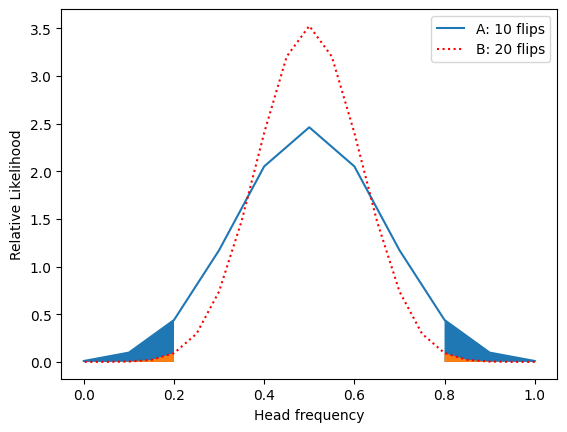

In [31]:
relative_likelihood_10 = [10 * prob for prob in prob_x10flips]
relative_likelihood_20 = [20 * prob for prob in prob_x20flips]


plt.plot(x10_freq, relative_likelihood_10, label = "A: 10 flips")
plt.plot(x20_freq, relative_likelihood_20, label = "B: 20 flips", color = 'r', linestyle = ':')
plt.fill_between(x10_freq, relative_likelihood_10, where=where)
plt.fill_between(x20_freq, relative_likelihood_20, where=where2)
plt.xlabel('Head frequency')
plt.ylabel('Relative Likelihood')
plt.legend()
plt.show()


Chapter 3



In [32]:
import numpy as np 

die_roll = np.random.randint(1,7)
assert 1 <= die_roll <= 6

np.random.seed(0)
die_rolls = [np.random.randint(1,7) for _ in range(3)]
assert die_rolls == [5,6,1]

coin_flip = np.random.randint(0,2)
print(f'Coin landed on {"heads" if coin_flip == 1 else "tails"}')




Coin landed on heads


In [33]:
np.random.seed(0)
def frequency_heads(coin_flip_sqeuence):
    total_heads = len([head for head in coin_flip_sqeuence if head == 1])
    return total_heads/len(coin_flip_sqeuence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f'Frequency of Heads is {freq_heads}')



Frequency of Heads is 0.8


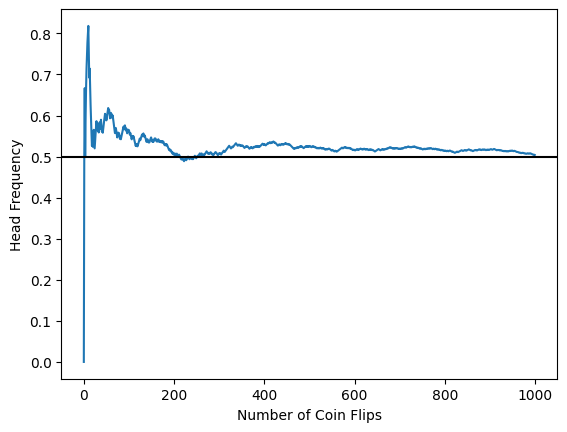

In [34]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0,2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head Frequency')
plt.show()

In [35]:
np.random.seed(0)
print('lets flip the baised coin once.')
coin_flip = np.random.binomial(1, 0.7)
print(f'Biased coin landed on {"heads" if coin_flip == 1 else "tails"}.')

print("\nLet's flip the biased coin 10 times.")
number_coin_flips = 10 
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{head_count} heads were observed out of "
       f"{number_coin_flips} biased coin flips"))

lets flip the baised coin once.
Biased coin landed on heads.

Let's flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


In [36]:
np.random.seed(0)
head_count = np.random.binomial(1000,0.7)
frequency = head_count/1000
print(f'Frequency of Heads is {frequency}')


Frequency of Heads is 0.697
